In [1]:
%%html
<style>
.uline {
    text-decoration: underline;
    text-decoration-color: #0013fc;
    text-decoration-thickness: 2px;
}

.uline:hover {
    transition: color 0.25s, background-color 0.25s;
    background-color: #0013fc;
    transition-timing-function: ease-in;
    color: white;
}
</style>


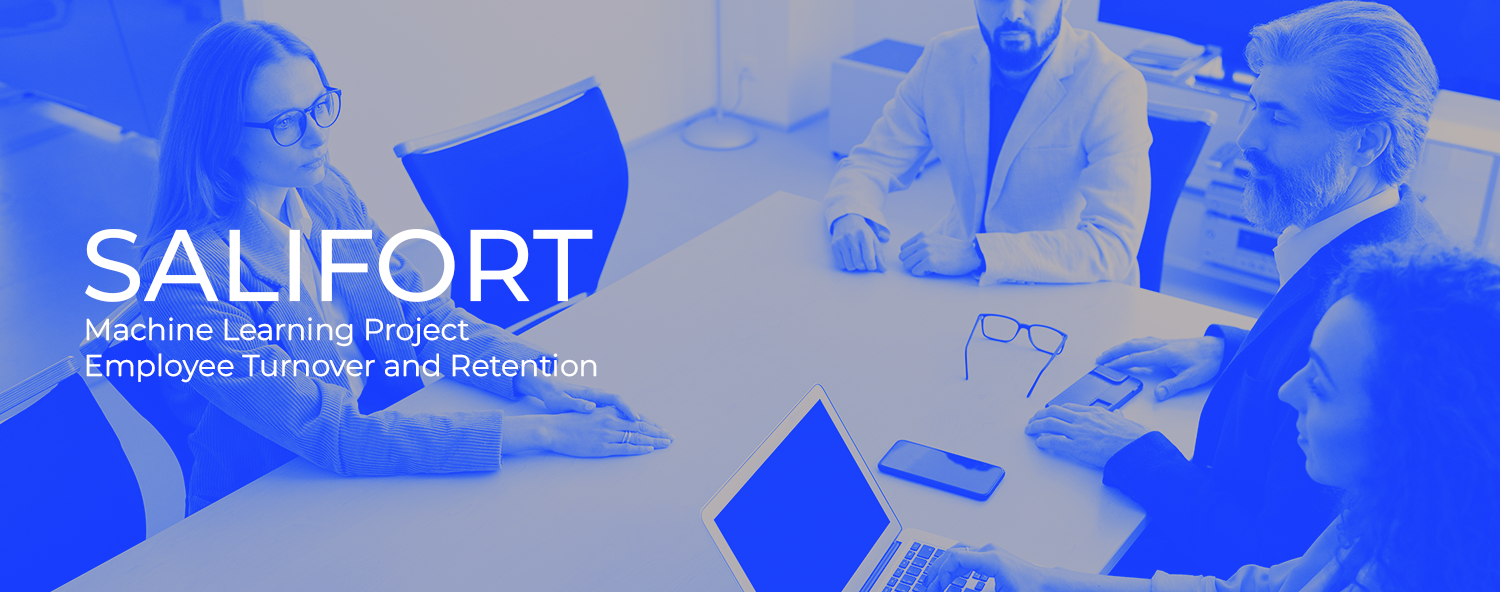

# <font color='#0013fc'>Google Advance Analytics Capstone</font>
---

# Executive Summary

⚒ work in progress

## About the company
Salifort Motors is a fictional French-based <font class='uline'>alternative energy vehicle manufacturer</font>. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

## Business case
As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how <font class='uline'>to increase employee retention.</font> To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points you deem helpful. 

## Scenario

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development.

>Further,the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees.

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points.

> A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure.

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 

# Implementing PACE Stage

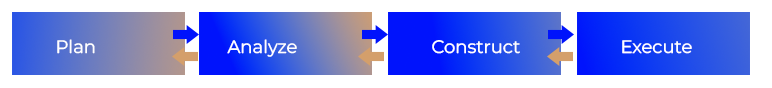

The project will implement the PACE framework for this analysis.

#  Plan
---
This project aims to solve the business needs of Salifort by exploring the data and building a machine learning model that will be able to predict employees who are likely to exit. The increasing employee turnover marks as a problem as hiring and interviewing candidates can be expensive. Being in a such a competitive industry, identifying the factors leading to employee turnover will help the Salifort in the long run.

## Feature Description

|Column Name|Type|Description
|---|---|---|
|satisfaction_level|int64|The employee’s self-reported satisfaction level [0-1]
|last_evaluation|int64|Score of employee's last performance review [0–1]
|number_project|int64|Number of projects employee contributes to
|average_monthly_hours|int64|Average number of hours employee worked per month
|time_spend_company|int64|How long the employee has been with the company (years)
|work_accident|int64|Whether or not the employee experienced an accident while at work
|left|int64|Whether or not the employee left the company
|promotion_last_5years|int64|Whether or not the employee was promoted in the last 5 years
|department|str|The employee's department
|salary|str|The employee's salary (low, medium, or high)

In [2]:
!python --version

Python 3.11.5


> Install requirements below to run notebook. Private Utility scripts are used for plotting .</div>

> ``!pip install plotnine pyjanitor==0.19 patchworklib --quiet``

In [3]:
# # requirements
# !pip install --upgrade plotnine patchworklib --quiet
# !pip install pyjanitor==0.19 --quiet

# Analyze

## Exploratory Data Analysis

The project will conduct an exploratory data analysis on our dataset. That includes cleaning, wrangling, and validation.

> Initial discovery:
- The data consist of 14,999 entries relating to the employee's background, performance, and overall satisfaction during their stay.
- The entries in the dataset does not have any missing values.
- That entries in the dataset does have duplicated features and will be removed from the analysis. 

> The project will use Python Programming Language version 3.11 for this analysis. And also the following modules:
- for wrangling and cleaning libraries pandas, and pyjanitor. 
- for visualziation seaborn, plotnine, matplotlib

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import janitor
import janitor.ml
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# utility script
from gp_utility.hr_script_plot import\
    plot_cat_features, plot_num_float_features,\
    plot_discrete_features, plot_binary_features_promotion,\
    plot_binary_features_accident

# module settings (pandas, seaborn, and matplotlib)
pd.options.display.max_columns = 100
sns.set(font_scale=0.8)
%matplotlib inline

# colar pallette for chart
color_pal = ['#5c86ff', '#db0049']

<Figure size 100x100 with 0 Axes>

In [6]:
def read_hr_data():

    # filename
    file_name = 'salifort_hr_data.csv'
    data_path = Path('data') / file_name

    # load dataframe and clean columns
    df = pd.read_csv(data_path) \
        .clean_names() \
        .rename_columns({
        'left': 'exit',
        'average_montly_hours': 'average_monthly_hours'})

    return df


In [6]:
# use read hr function to load and clean data
df_original = read_hr_data()

# set a copy for wrangling purposes
df = df_original.copy()

In [7]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   exit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# check feature datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
exit                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

## Missing

In [9]:
# check for missing entries in all of our features
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
exit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Duplicated

In [10]:
# check for duplicate entries
duplicated_entries = df[df.duplicated()]
duplicated_entries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3008 entries, 396 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3008 non-null   float64
 1   last_evaluation        3008 non-null   float64
 2   number_project         3008 non-null   int64  
 3   average_monthly_hours  3008 non-null   int64  
 4   time_spend_company     3008 non-null   int64  
 5   work_accident          3008 non-null   int64  
 6   exit                   3008 non-null   int64  
 7   promotion_last_5years  3008 non-null   int64  
 8   department             3008 non-null   object 
 9   salary                 3008 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 258.5+ KB


In [11]:
# original data department value counts
df.department.value_counts(normalize=True) * 100

department
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: proportion, dtype: float64

In [12]:
# duplicated entries department value counts
duplicated_entries.department.value_counts(normalize=True) * 100

department
sales          29.953457
technical      15.824468
support        13.563830
IT              8.344415
product_mng     7.180851
management      6.449468
marketing       6.150266
accounting      4.853723
hr              4.587766
RandD           3.091755
Name: proportion, dtype: float64

### Investigate Duplicated Entries

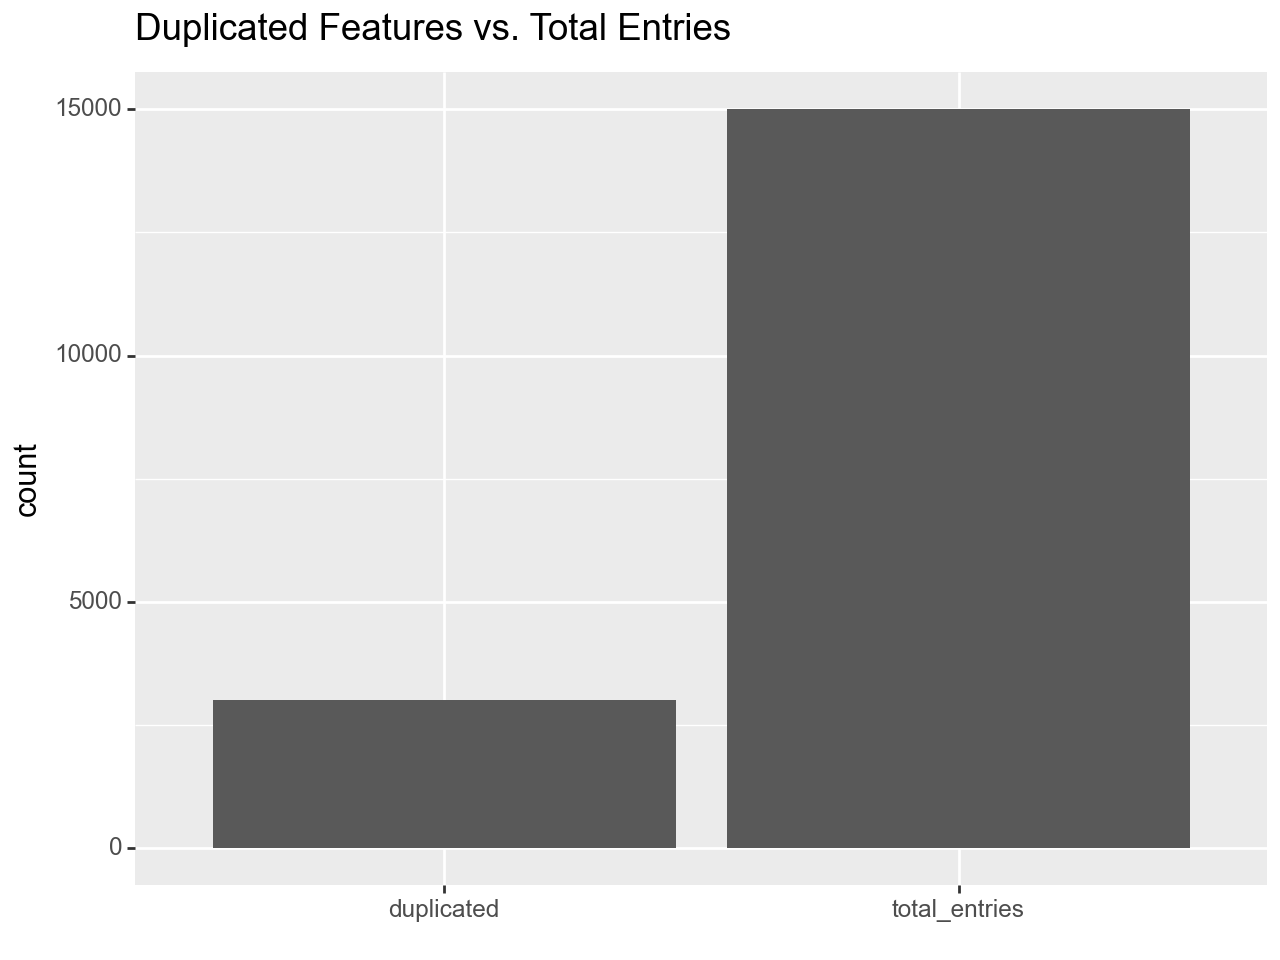

In [13]:
duplicated_data_summary = {'total_entries': [df.shape[0]], 'duplicated': [duplicated_entries.shape[0]]}
duplicated_viz = pd.melt(pd.DataFrame.from_dict(duplicated_data_summary))

duplicated_plot = (ggplot(duplicated_viz)\
    + geom_col(aes(x='variable', y='value'), position='stack')\
    + labs(y='count', x='', title='Duplicated Features vs. Total Entries')).draw();

duplicated_plot

In [14]:
duplicated_entries.exit.value_counts()

exit
1    1580
0    1428
Name: count, dtype: int64

In [15]:
np.round(duplicated_entries.department.value_counts(normalize=True) * 100, 1) 

department
sales          30.0
technical      15.8
support        13.6
IT              8.3
product_mng     7.2
management      6.4
marketing       6.2
accounting      4.9
hr              4.6
RandD           3.1
Name: proportion, dtype: float64

### Drop Decision
---

Duplicated features may be a result of technical error during the collation and will be removed from this analysis. Further questions & inquiry regarding the duplicated entries can be forwarded to salifort data & technical team.

In [16]:
# drop duplicated features
df = df.drop_duplicates(keep='first')

## Object Features

In [17]:
df.select_dtypes('object').describe()

department salary
count       11991  11991
unique         10      3
top         sales    low
freq         3239   5740

In [18]:
df['exit'].value_counts(normalize=True) * 100

exit
0    83.39588
1    16.60412
Name: proportion, dtype: float64

In [19]:
plot_salary, plot_department = plot_cat_features(df)

### Exit based on Low, Medium, and High Salary

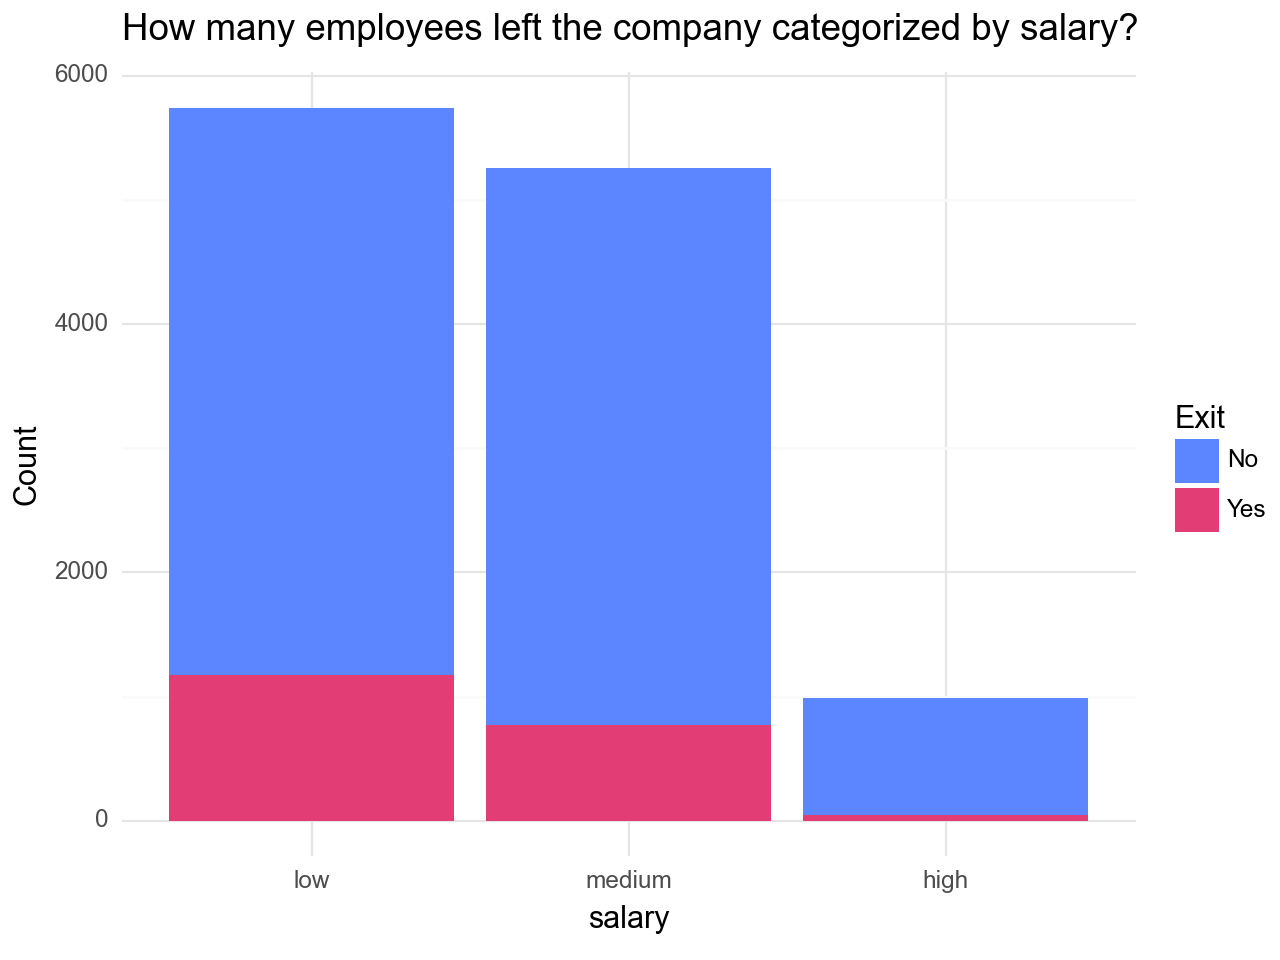

In [20]:
plot_salary.draw()

### Count of employees leaving their work based on salary

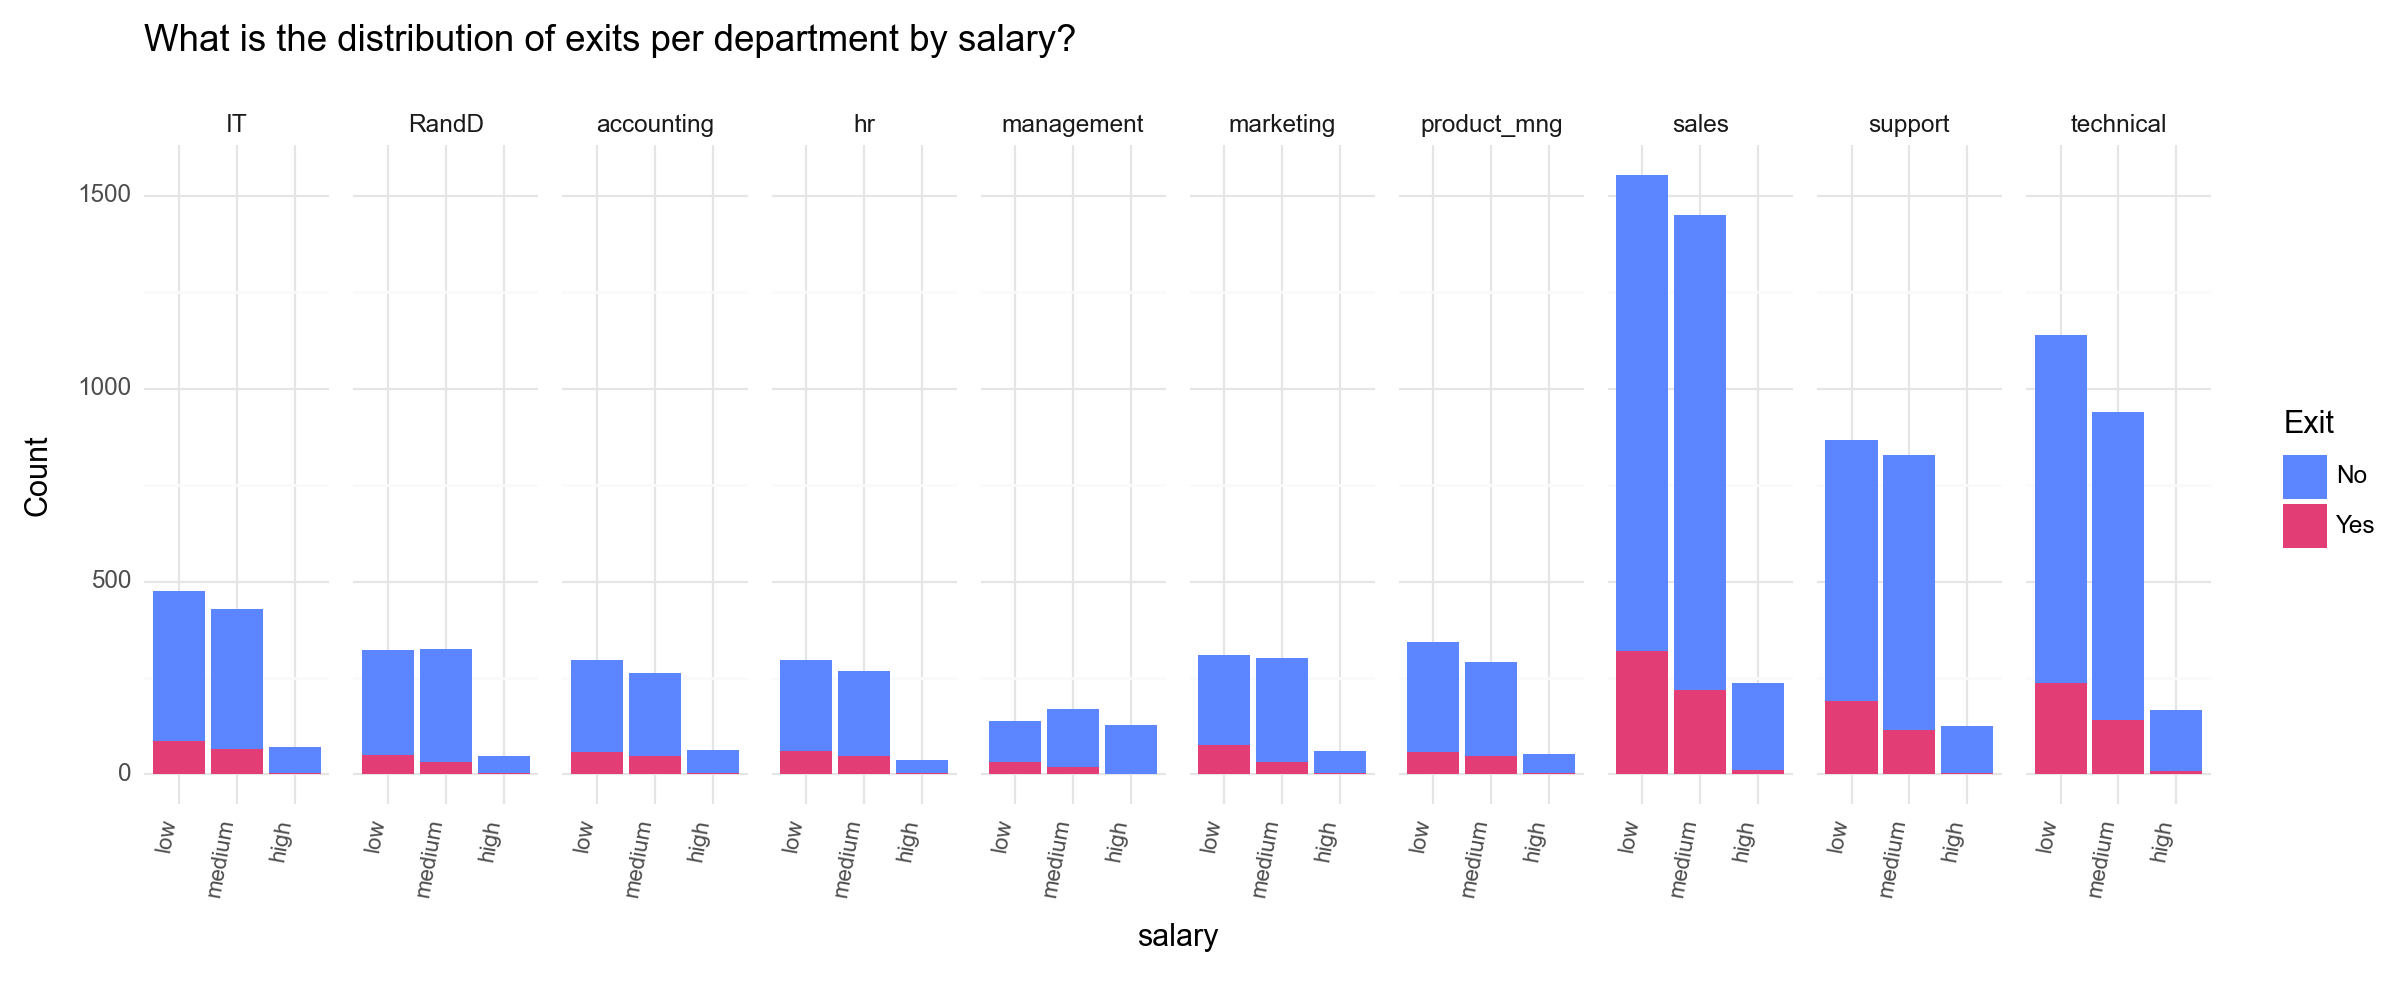

In [21]:
plot_department.draw()

## Numerical Features

### Satisfaction Level & Performance Evaluation KDE

In [22]:
float_features = df.select_dtypes('float').columns.to_list()
float_features.append('exit')
float_feat_df = df[float_features]
float_feat_df.exit = float_feat_df.exit.astype('str')

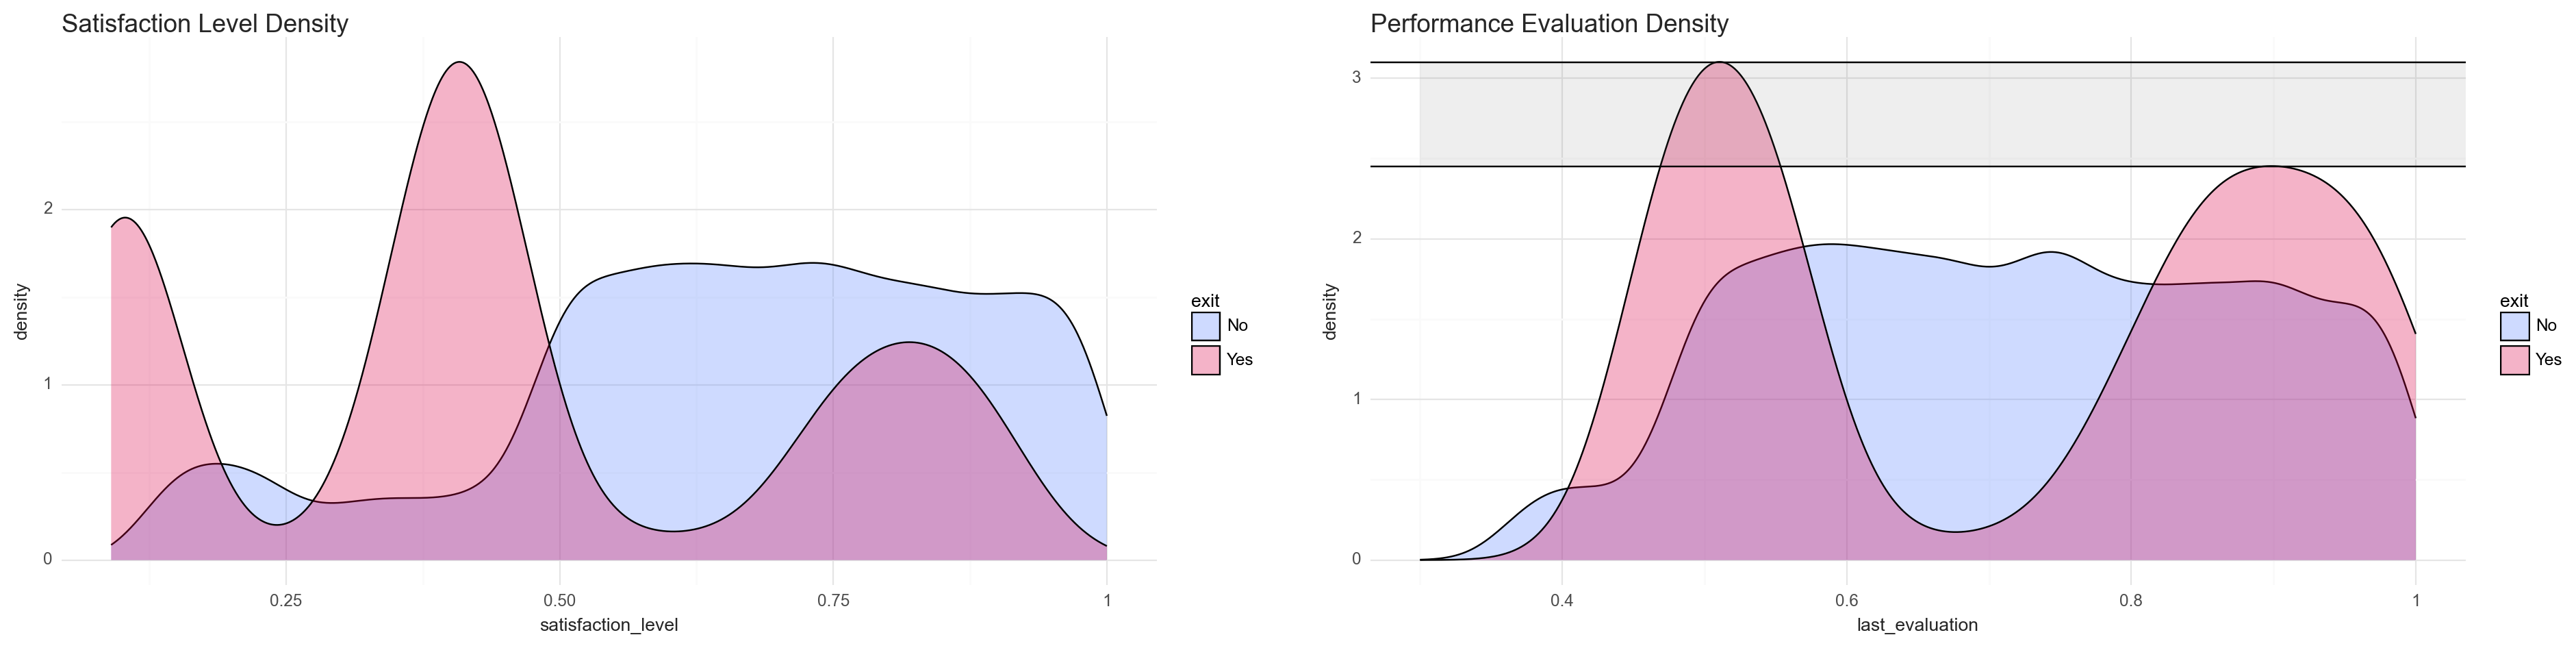

In [23]:
plot_num_float_features(float_feat_df, color_pal)

### Discrete Features Distribution by Factor of Exit

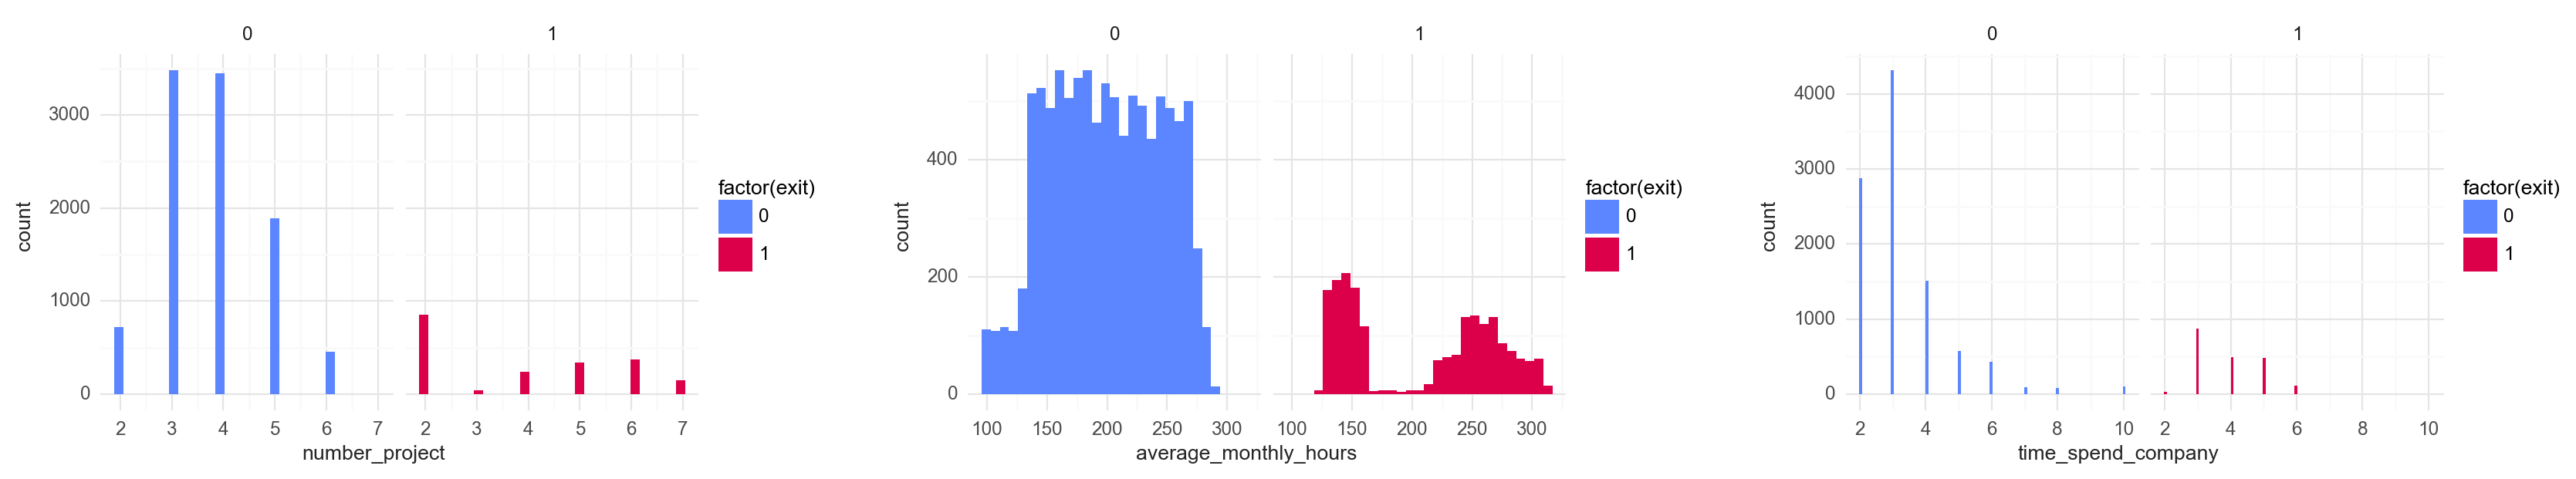

In [24]:
# discrete features
int_features = df.select_dtypes('integer').reorder_columns(['exit'])
discrete_features = int_features[['number_project', 'average_monthly_hours', 'time_spend_company', 'exit']]
plot_discrete_features(discrete_features, color_pal)

## Binary Features

In [25]:
int_features.work_accident.value_counts(normalize=True) * 100

work_accident
0    84.571762
1    15.428238
Name: proportion, dtype: float64

In [26]:
int_features.promotion_last_5years.value_counts(normalize=True) * 100

promotion_last_5years
0    98.307064
1     1.692936
Name: proportion, dtype: float64

In [27]:
int_features.exit.value_counts(normalize=True) * 100

exit
0    83.39588
1    16.60412
Name: proportion, dtype: float64

### Promotion

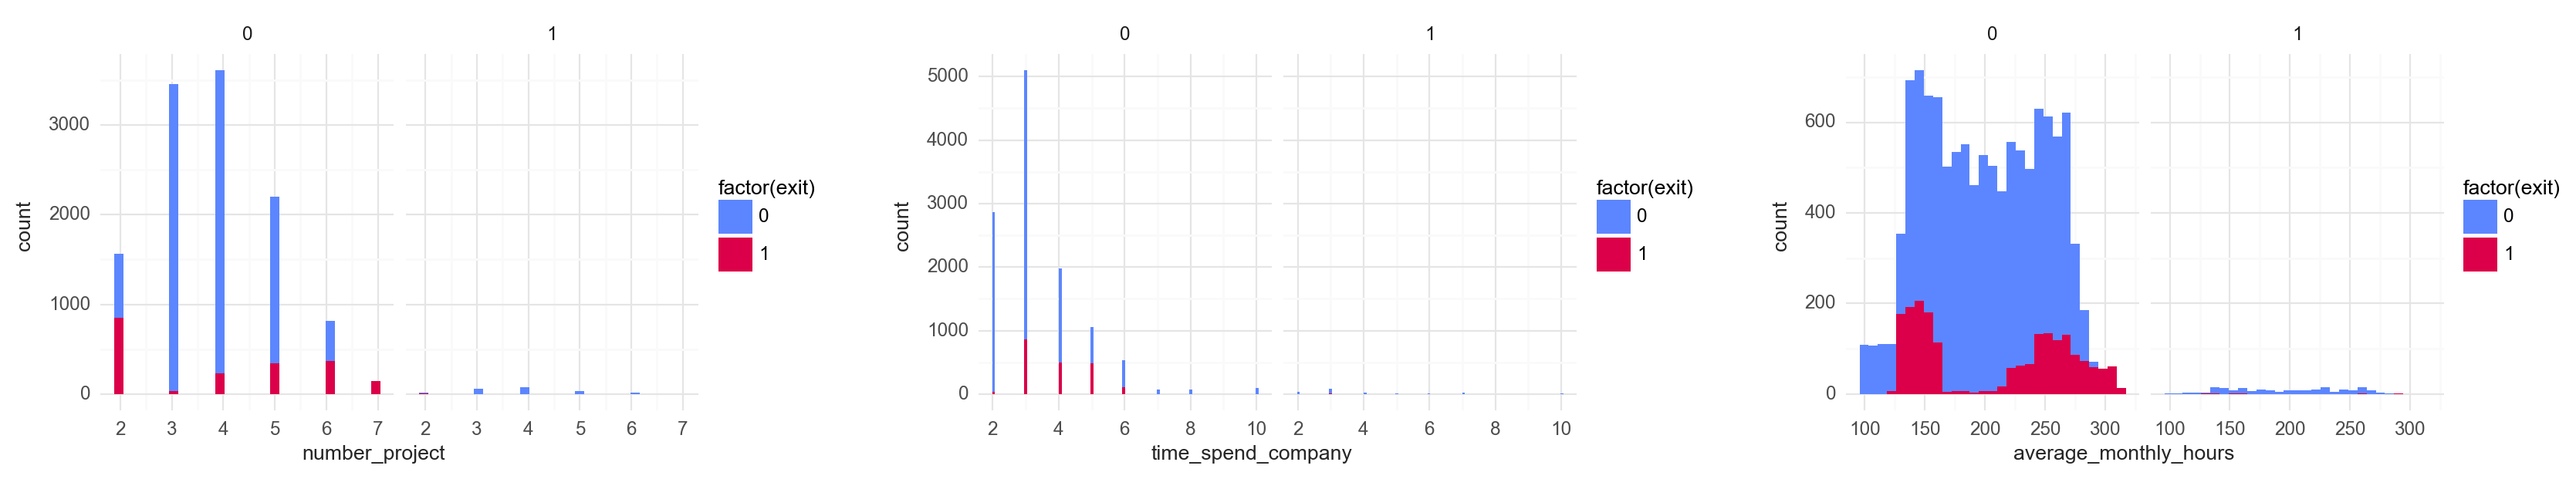

In [28]:
plot_binary_features_promotion(int_features, color_pal)

### Work Accident

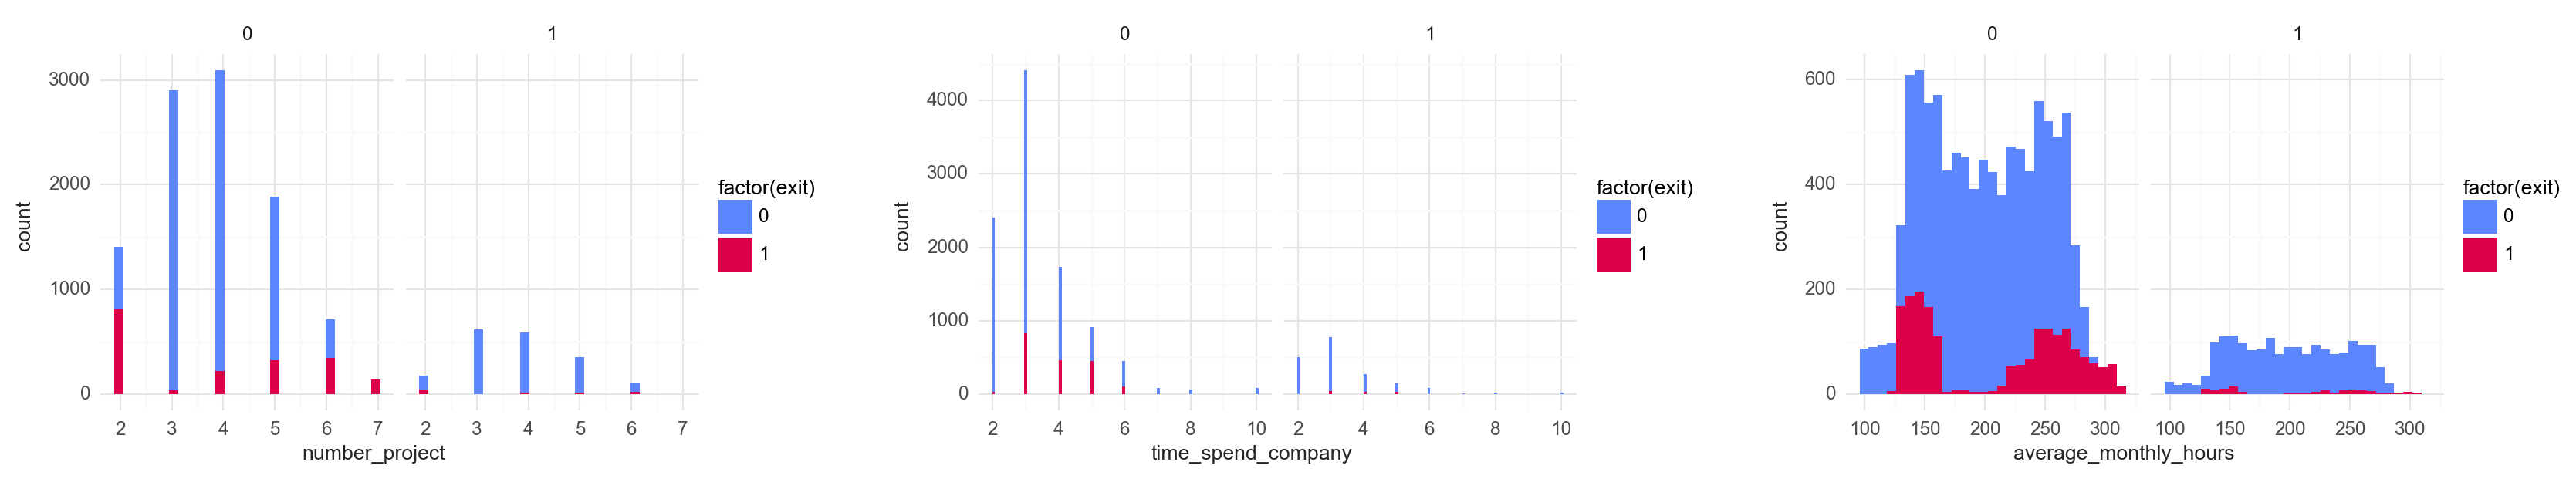

In [29]:
plot_binary_features_accident(int_features, color_pal)

## Scatter Matrix

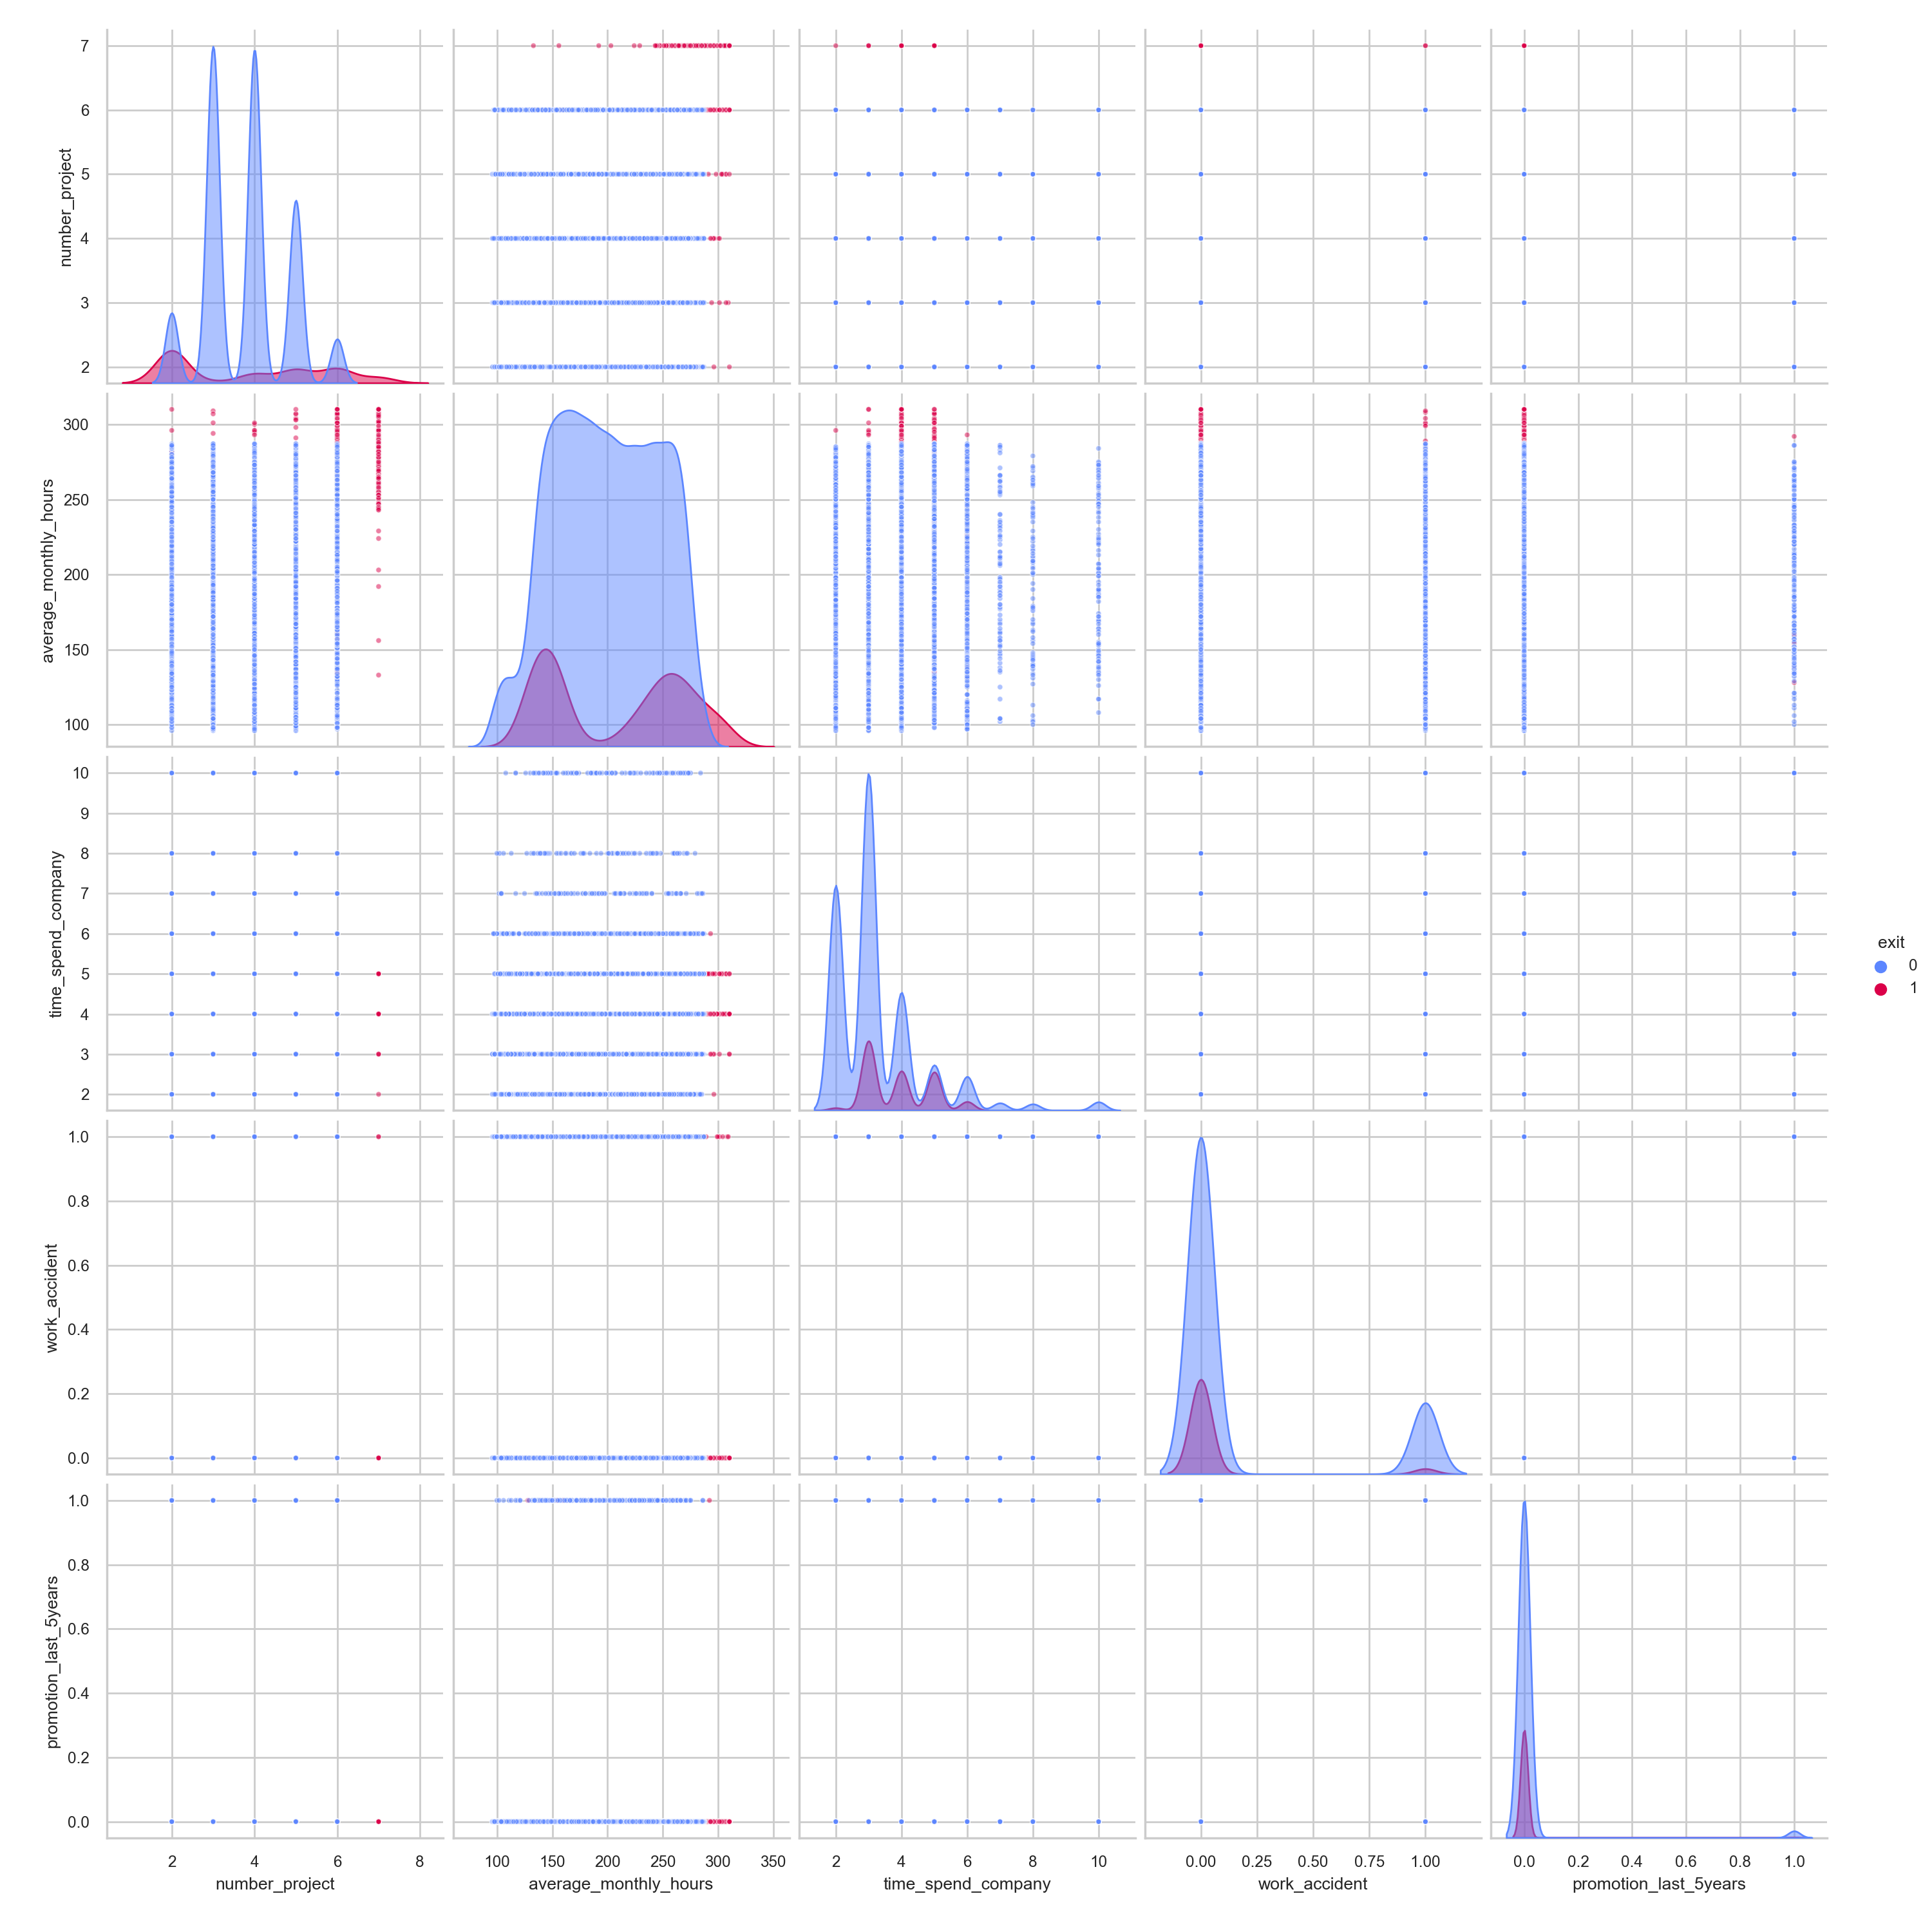

In [30]:
sns.set_style("whitegrid")
mat = sns.pairplot(int_features, hue='exit', palette=color_pal, markers='.', diag_kws={'alpha': 0.5}, plot_kws={'alpha': 0.5})
mat.fig.set_size_inches(15, 15)

## Unsupervised Machine Learning

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score
import patchworklib as pw

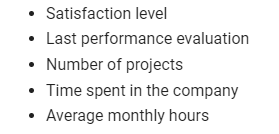

### KMeans

In [33]:
from typing import Iterator

In [34]:
def kmeans_inertia(num_clusters, x_vals) -> list:

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
        
    return inertia

def kmeans_sil(num_clusters, x_vals) -> list:
    
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
        
    return sil_score

def plot_kmean_feat(x_feat) -> ggplot:
    
    values = ['#5c86ff', '#db0049', "#EBD323"]
    g_plot = (ggplot(scaled_important_features)\
        + geom_point(aes(x=x_feat, y='satisfaction_level', fill='factor(clusters)'), alpha=0.3)\
        + scale_fill_manual(values=values, labels=[0, 1, 2])\
        + theme_minimal())
    return g_plot
    
def save_kmean_3_cluster_plots() -> Iterator[ggplot]:
    
    x_features = ['last_evaluation', 'average_monthly_hours', 'number_project', 'time_spend_company']
    values = ['#FFA500', '#9467bd', '#008080']
    
    for feat in x_features:
        g = ggplot(scaled_important_features)\
            + geom_point(aes(x=feat, y='satisfaction_level', fill='factor(clusters)'), alpha=0.3)\
            + scale_fill_manual(values=values, labels=[0, 1, 2])\
            + theme_minimal()
        
        yield g

In [35]:
# select important features from ensemble models
important_features = df.select_dtypes('number').iloc[:, :-3]
scaled_features = StandardScaler().fit_transform(important_features)
scaled_important_features = pd.DataFrame(scaled_features, columns=important_features.columns)

# use elbow method to decide for number of clusters
num_clusters = [i for i in range(2, 11)]
inertia = kmeans_inertia(num_clusters, scaled_important_features)

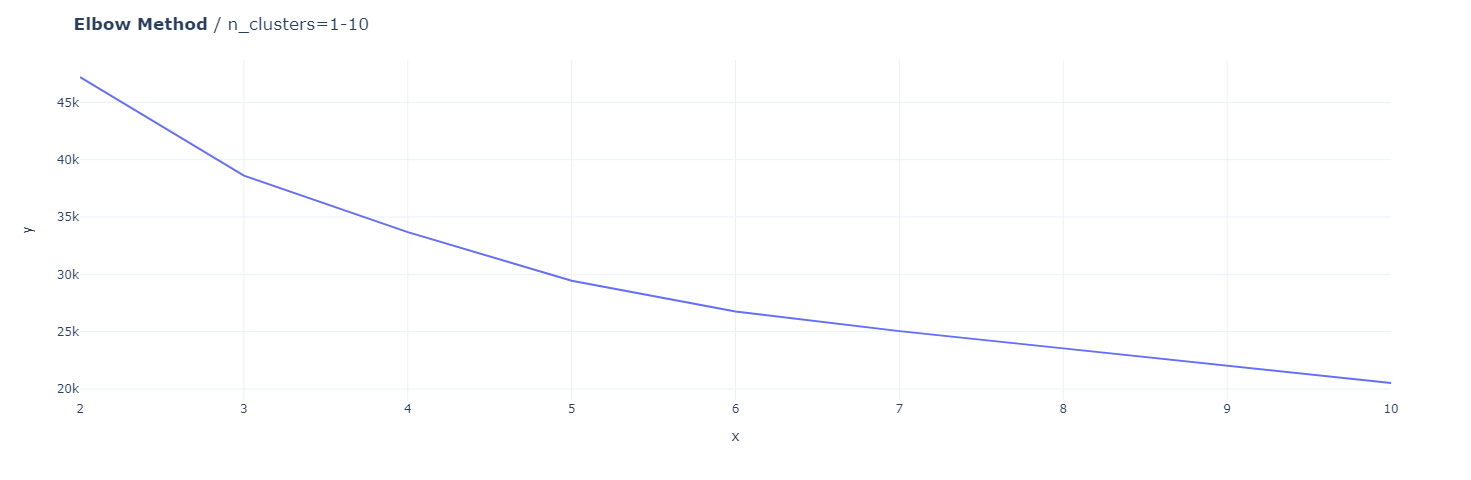

In [36]:
# create an inertia line plot using plotly express
inertia_plot = px.line(x=num_clusters, y=inertia)\
    .update_layout(template='plotly_white', width=800, height=480,
                   title='<b>Elbow Method</b> / n_clusters=1-10')\
    .update_traces(marker={'color': 'black'})

inertia_plot

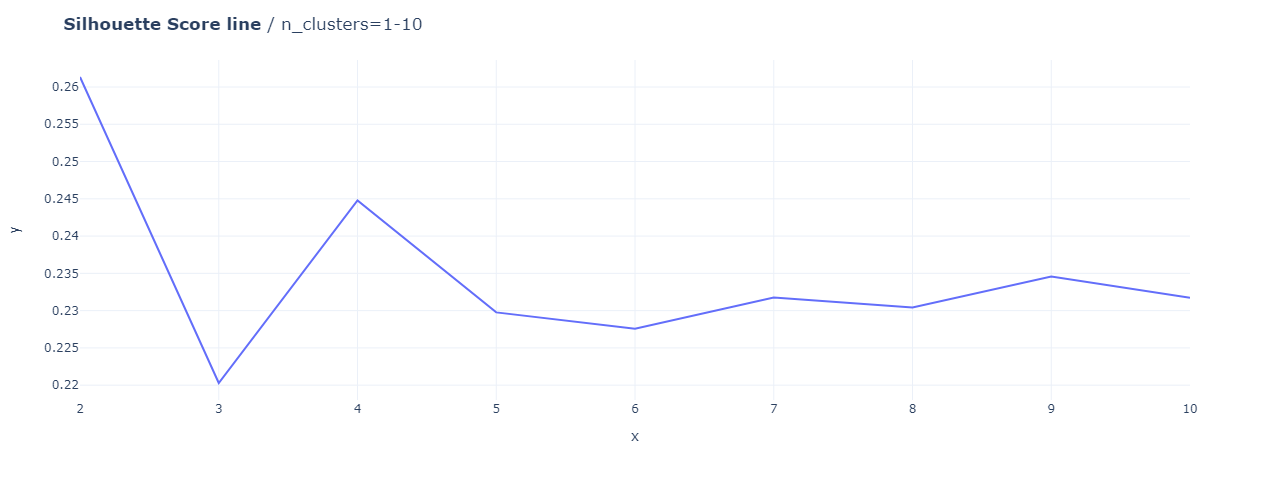

In [37]:
# create a silhouette score line plot using plotly express
sil_score = kmeans_sil(num_clusters, scaled_important_features)
sil_plot = px.line(x=num_clusters, y=sil_score)\
    .update_layout(template='plotly_white', width=800, height=480,
                  title='<b>Silhouette Score line</b> / n_clusters=1-10')\

sil_plot

In [ ]:
# KMeans clusters of 2 (0, 1, 2)
km3 = KMeans(n_clusters=3, random_state=4).fit(scaled_important_features)
scaled_important_features['clusters'] = km3.labels_

# patch plots from kmeans output
feat_to_plot = ["last_evaluation", "average_monthly_hours", "number_project", "time_spend_company"]
plot_collection = [plot_kmean_feat(i) for i in feat_to_plot]
plot_g = [pw.load_ggplot(plot, figsize=(5,3)) for plot in plot_collection]
plot_mat_g = ((plot_g[0]|plot_g[1])/(plot_g[2]|plot_g[3]))

In [41]:
# save kmeans plot to pdf
save_as_pdf_pages(save_kmean_3_cluster_plots(), path='viz_output', filename='kmeans_cluster.pdf')

# Construct

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, accuracy_score, recall_score,\
     f1_score, confusion_matrix, classification_report, silhouette_score

from xgboost import XGBClassifier
from xgboost import plot_importance

import gp_utility.project_ml as pml

In [8]:
hr = read_hr_data()
# report = sv.analyze(hr)
# report.show_html()

# set copy of original data
original_df = hr.copy(deep=True)
df = original_df.drop_duplicates()

In [9]:
df = df\
    .clean_names()\
    .encode_categorical(column_names=['department', 'salary'])

## Model Preparation

In [10]:
# selecting features DV, IV
X, y = df.get_features_targets(target_column_names='exit')

# store different types in variables
numerical_features = X.select_dtypes('number')
categorical_features = X.select_dtypes('category')

# store column names
num_feat_names = numerical_features.columns.to_list()
cat_feat_names = categorical_features.columns.to_list()

# make column transformer
transformer = make_column_transformer(
    (StandardScaler(), num_feat_names),
    (OneHotEncoder(sparse=False), cat_feat_names))

# fit features into transformer
fit_ct = transformer.fit(X)
X_transformed = fit_ct.transform(X)

# get ohe featurenames
ohe_col_names = fit_ct.named_transformers_['onehotencoder']\
    .get_feature_names_out()

# add ohe feature names to num feature names
all_feature_names = num_feat_names
all_feature_names.extend(list(ohe_col_names))

# create finished dataframe
X_CT = pd.DataFrame(X_transformed, columns=all_feature_names)

# # Fixed variables for our models
TRAIN_SPLIT = 0.75
M_RN_STATE = 2

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_CT, y,
    train_size=TRAIN_SPLIT,
    random_state=M_RN_STATE)

## Feature Selection

In [11]:
# creeate a classification dict
classification_model = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=M_RN_STATE),
    'RandomForestClassifier' : RandomForestClassifier(random_state=M_RN_STATE),
    'SupportVectorClassifier': SVC(random_state=M_RN_STATE),
    'LogisticRegression': LogisticRegression(random_state=M_RN_STATE)}

In [12]:
# create an empty feature importance dict
m_feature_importance = dict()
pml.train_models(
    classification_model,
    [X_train, X_test, y_train, y_test],
    m_feature_importance,
    all_feature_names)


        Model: DecisionTreeClassifier --------------------
        f1-score: 89.91
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2493
           1       0.89      0.91      0.90       505

    accuracy                           0.97      2998
   macro avg       0.94      0.94      0.94      2998
weighted avg       0.97      0.97      0.97      2998


        Model: RandomForestClassifier --------------------
        f1-score: 94.85
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2493
           1       0.99      0.91      0.95       505

    accuracy                           0.98      2998
   macro avg       0.99      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998


        Model: SupportVectorClassifier --------------------
        f1-score: 90.13
              precision    recall  f1-score   support

           0       0.98      0.98     

In [13]:
# transform feature importance data into dataframe
df_importance = [pd.DataFrame(data)
    for data in pml.get_table_feature_importance(m_feature_importance)]

# create a table of feature importance with classification anmes
table_feat_importance = [frame.set_index('feature')\
        .rename_columns({'importance': f'{name}'})\
        for frame, name in zip(df_importance, classification_model.keys())]

# style the table values
table_feat_importance = pd.concat(
    table_feat_importance, axis=1)\
    .style.background_gradient(cmap='viridis')

# export data as html
table_feat_importance.to_html('viz_output/feat_importance.html')

**Synthesis**<br>
The Logistic and SVM models chose similar features in importance. Both assigned
a low salary as the main predictor for an exit. In comparison to the tree and ensemble model, both assigned satisfaction level as the likely predictors of exit.

Decision Tree and RandomForest gave little importance to wether
which department an employee belongs or the level of their salary.
The list of features that are of high importance of both models are of the following:

**What features are important for both Tree & Ensemble Models?**
*   Satisfaction level
*   Last performance evaluation
*   Number of projects
*   Time spent in the company
*   Average monthly hours

## Boosting Models

In [14]:
import pandas_flavor as pf
from gp_utility.cf_matrix import make_confusion_matrix

In [15]:
@pf.register_dataframe_method
def get_base_metrics(df, y_test, y_pred) -> pd.DataFrame:
    """
    :description:
        ...
    :y_test: Test data from training split
    :y_test type: array
    :y_pred: Predict data from model
    :y_pred type: array
    :returns: Dataframe with model metrics score.
    """
    return df.assign(base_f1_score=[f1_score(y_test, y_pred)])\
        .assign(base_recall_score=[recall_score(y_test, y_pred)])\
        .assign(base_precision_score=[precision_score(y_test, y_pred)])\
        .assign(base_accuracy_score=[accuracy_score(y_test, y_pred)])

### XGBoost

In [16]:
xgb = XGBClassifier(objective='binary:logistic', random_state=M_RN_STATE)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [17]:
# predict test data
y_pred = xgb.predict(X_test)

# store score in dataframe
base_model_score = pd.DataFrame()
base_model_score.get_base_metrics(y_test, y_pred)

base_f1_score  base_recall_score  base_precision_score  base_accuracy_score
0        0.94964           0.914851              0.987179             0.983656

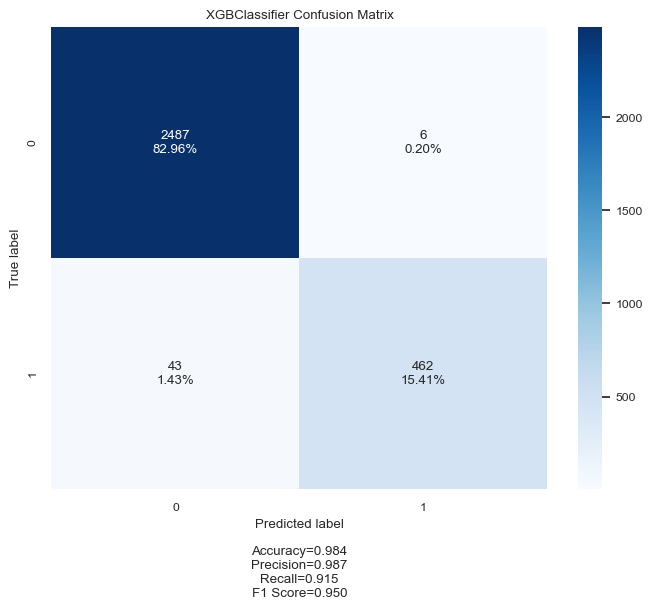

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
make_confusion_matrix(cm, figsize=(8,6),
    title='XGBClassifier Confusion Matrix')

### AdaBoost

In [19]:
ad = AdaBoostClassifier(random_state=M_RN_STATE)
ad.fit(X_train, y_train)

AdaBoostClassifier(random_state=2)

In [20]:
ada_boost_metrics = pd.DataFrame()
ada_y_pred = ad.predict(X_test)
ada_boost_metrics.get_base_metrics(y_test, ada_y_pred)

base_f1_score  base_recall_score  base_precision_score  base_accuracy_score
0       0.884848           0.867327              0.903093             0.961975

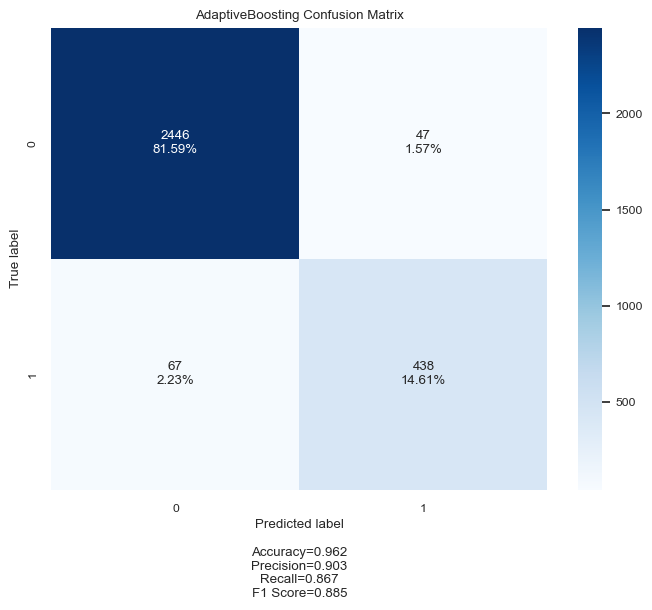

In [21]:
cm = confusion_matrix(y_test, ada_y_pred, labels=ad.classes_)
make_confusion_matrix(cm, figsize=(8,6),
    title='AdaptiveBoosting Confusion Matrix')

### ROC - AUC

In [22]:
transformed_list = [X_train, X_test, y_train, y_test]

# create a classification dict
classification_model = {
    'DecisionTreeClassifier' : DecisionTreeClassifier(
        random_state=M_RN_STATE),
    'RandomForestClassifier' : RandomForestClassifier(
        random_state=M_RN_STATE),
    'AdaptiveBoost': AdaBoostClassifier(
        random_state=M_RN_STATE),
    'XGBoostClassifier': XGBClassifier(
        random_state=M_RN_STATE)}

In [23]:
clm_auc_roc_score = {k: '' for k in classification_model.keys()}

In [24]:
# prepare model dataframe probability for roc auc

roc_auc_dt = pml.get_roc_auc(y_test, 'DecisionTreeClassifier',
    transformed_list, clm_auc_roc_score, classification_model)

roc_auc_rfc = pml.get_roc_auc(y_test, 'RandomForestClassifier',
    transformed_list, clm_auc_roc_score, classification_model)

roc_auc_ada = pml.get_roc_auc(y_test, 'AdaptiveBoost',
    transformed_list, clm_auc_roc_score, classification_model)

roc_auc_xgb = pml.get_roc_auc(y_test, 'XGBoostClassifier',
    transformed_list, clm_auc_roc_score, classification_model)

In [25]:
# concat dataframes for plotting
roc_auc_all_models = [roc_auc_dt, roc_auc_rfc, roc_auc_ada, roc_auc_xgb]
roc_auc_all_models_df = pd.concat(roc_auc_all_models, axis=0)

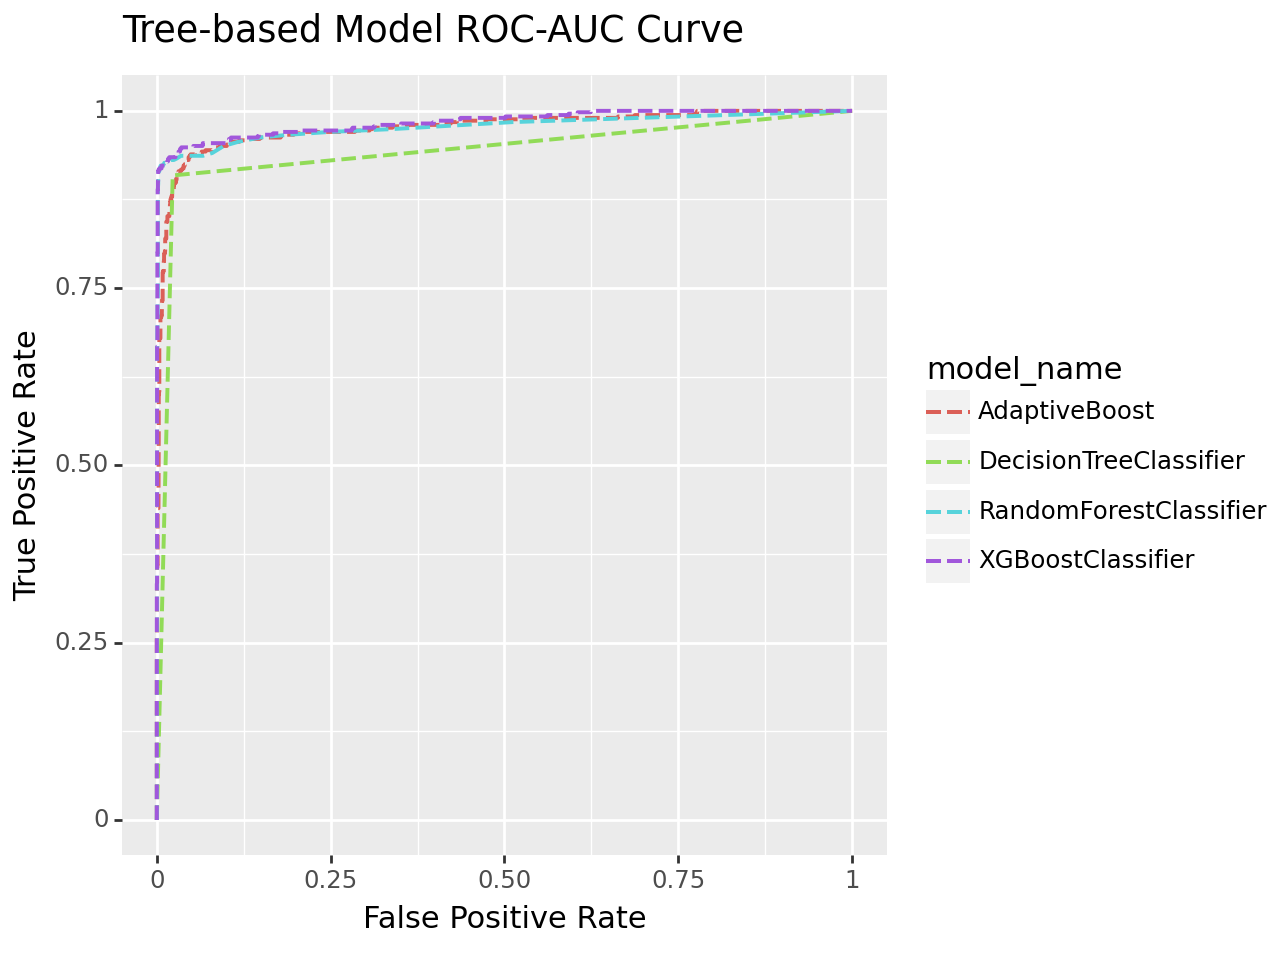

<Figure Size: (640 x 480)>

In [26]:
ggplot() + geom_line(roc_auc_all_models_df,
    aes(x='fpr', y='tpr', color='model_name'),size=0.8, linetype='dashed')\
    + ggtitle('Tree-based Model ROC-AUC Curve')\
    + labs(x='False Positive Rate', y='True Positive Rate')
    + 

The tree based models are performing well in our ROC-AUC curve. On the other hand, the decision-tree classifier performing less than the other models and will not proceed to tuning.

**The models that we'll be using for tuning hyperparameters**

- random forest classifier,
- xgboost,
- adaptive boost.

And compare their performance in unknown data (f1-score).

## GridSearch CV